In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r"Real estate valuation data set.csv").to_numpy()

In [11]:
data.shape

(414, 7)

In [3]:
X = np.zeros((414,6))
X[:,1:6] = data[:,1:6]
X[:,0]=np.ones(414)
print(X)


[[  1.       32.       84.87882  10.       24.98298 121.54024]
 [  1.       19.5     306.5947    9.       24.98034 121.53951]
 [  1.       13.3     561.9845    5.       24.98746 121.54391]
 ...
 [  1.       18.8     390.9696    7.       24.97923 121.53986]
 [  1.        8.1     104.8101    5.       24.96674 121.54067]
 [  1.        6.5      90.45606   9.       24.97433 121.5431 ]]


In [4]:
Y = data[:,6]
print(Y.shape)

(414,)


In [5]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
B

array([-4.94559499e+03, -2.68916833e-01, -4.25908900e-03,  1.16302048e+00,
        2.37767190e+02, -7.80545362e+00])

In [6]:
Y_pred = np.dot(X,B)
e = Y - Y_pred

In [12]:
table=np.zeros((len(Y),4))
table[:,0] = np.arange(1,len(Y)+1,dtype=int)
table[:,1] = Y 
table[:,2] = Y_pred
table[:,3] = e
df = pd.DataFrame(table,columns =['Standard Order', 'Actual Value(Y)', 'Fitted Value(Y_pred)','Residual'])
print("\nError Table for Multiple Regression\n")
display(df)


Error Table for Multiple Regression



,Standard Order,Actual Value(Y),Fitted Value(Y_pred),Residual
0,1.0,37.9,48.524623,-10.624623
1,2.0,42.2,49.156748,-6.956748
2,3.0,47.3,46.742781,0.557219
3,4.0,54.8,46.742781,8.057219
4,5.0,43.1,47.792726,-4.692726
...,...,...,...,...
409,410.0,15.4,15.225095,0.174905
410,411.0,50.0,52.358243,-2.358243
411,412.0,40.6,46.392935,-5.792935
412,413.0,52.5,45.187048,7.312952


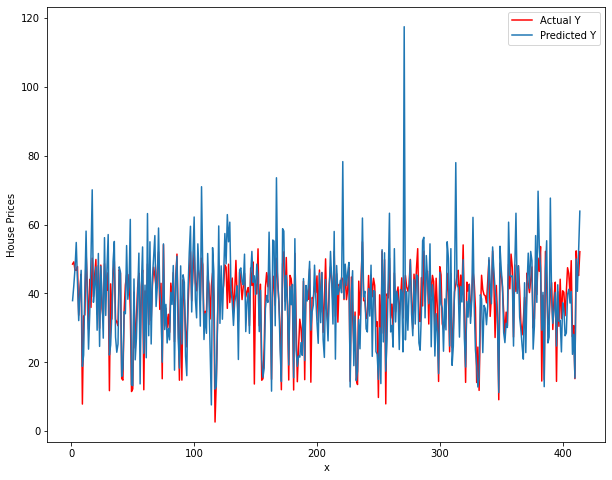

In [8]:
# = np.linspace(414)
x=np.arange(1,415)

plt.figure(figsize=(10, 8))
plt.plot(x, Y_pred,color='red')
plt.plot(x, Y, linestyle='-' )
plt.xlabel('x')
plt.ylabel('House Prices')
plt.legend(["Actual Y","Predicted Y"])
plt.show()

In [9]:
# manual error calculation
mae_f = np.mean(abs(e))

print("Error Result : ")
print()
print("MAE:",mae_f)

Error Result : 

MAE: 6.174868315723788
